In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
df=pd.read_csv('car_price_prediction.csv')
## explore the data
df.head(10)

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,45654403,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005 km,6.0,Automatic,4x4,04-May,Left wheel,Silver,12
1,44731507,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000 km,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8
2,45774419,8467,-,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000 km,4.0,Variator,Front,04-May,Right-hand drive,Black,2
3,45769185,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966 km,4.0,Automatic,4x4,04-May,Left wheel,White,0
4,45809263,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901 km,4.0,Automatic,Front,04-May,Left wheel,Silver,4
5,45802912,39493,891,HYUNDAI,Santa FE,2016,Jeep,Yes,Diesel,2,160931 km,4.0,Automatic,Front,04-May,Left wheel,White,4
6,45656768,1803,761,TOYOTA,Prius,2010,Hatchback,Yes,Hybrid,1.8,258909 km,4.0,Automatic,Front,04-May,Left wheel,White,12
7,45816158,549,751,HYUNDAI,Sonata,2013,Sedan,Yes,Petrol,2.4,216118 km,4.0,Automatic,Front,04-May,Left wheel,Grey,12
8,45641395,1098,394,TOYOTA,Camry,2014,Sedan,Yes,Hybrid,2.5,398069 km,4.0,Automatic,Front,04-May,Left wheel,Black,12
9,45756839,26657,-,LEXUS,RX 350,2007,Jeep,Yes,Petrol,3.5,128500 km,6.0,Automatic,4x4,04-May,Left wheel,Silver,12


In [4]:
## check the number of rows and columns
df.shape

(19237, 18)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19237 entries, 0 to 19236
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                19237 non-null  int64  
 1   Price             19237 non-null  int64  
 2   Levy              19237 non-null  object 
 3   Manufacturer      19237 non-null  object 
 4   Model             19237 non-null  object 
 5   Prod. year        19237 non-null  int64  
 6   Category          19237 non-null  object 
 7   Leather interior  19237 non-null  object 
 8   Fuel type         19237 non-null  object 
 9   Engine volume     19237 non-null  object 
 10  Mileage           19237 non-null  object 
 11  Cylinders         19237 non-null  float64
 12  Gear box type     19237 non-null  object 
 13  Drive wheels      19237 non-null  object 
 14  Doors             19237 non-null  object 
 15  Wheel             19237 non-null  object 
 16  Color             19237 non-null  object

In [5]:
## summary statistics of numerical variables
df.describe()

,ID,Price,Prod. year,Cylinders,Airbags
count,1.923700e+04,1.923700e+04,19237.000000,19237.000000,19237.000000
mean,4.557654e+07,1.855593e+04,2010.912824,4.582991,6.582627
std,9.365914e+05,1.905813e+05,5.668673,1.199933,4.320168
min,2.074688e+07,1.000000e+00,1939.000000,1.000000,0.000000
25%,4.569837e+07,5.331000e+03,2009.000000,4.000000,4.000000
50%,4.577231e+07,1.317200e+04,2012.000000,4.000000,6.000000
75%,4.580204e+07,2.207500e+04,2015.000000,4.000000,12.000000
max,4.581665e+07,2.630750e+07,2020.000000,16.000000,16.000000


In [7]:
## check the data types of variables
df.dtypes

ID                    int64
Price                 int64
Levy                 object
Manufacturer         object
Model                object
Prod. year            int64
Category             object
Leather interior     object
Fuel type            object
Engine volume        object
Mileage              object
Cylinders           float64
Gear box type        object
Drive wheels         object
Doors                object
Wheel                object
Color                object
Airbags               int64
dtype: object

In [8]:
## check if the data has missing values
df.isnull().sum()

ID                  0
Price               0
Levy                0
Manufacturer        0
Model               0
Prod. year          0
Category            0
Leather interior    0
Fuel type           0
Engine volume       0
Mileage             0
Cylinders           0
Gear box type       0
Drive wheels        0
Doors               0
Wheel               0
Color               0
Airbags             0
dtype: int64

In [11]:
# check for duplicates in the data
df.duplicated().sum()

313

In [13]:
## drop the duplicates present in the data
df.drop_duplicates(inplace=True)

In [14]:
#check for the dimension of data again
df.shape

(18924, 18)

In [15]:
## Analysis of data
df['Manufacturer'].unique()

array(['LEXUS', 'CHEVROLET', 'HONDA', 'FORD', 'HYUNDAI', 'TOYOTA',
       'MERCEDES-BENZ', 'OPEL', 'PORSCHE', 'BMW', 'JEEP', 'VOLKSWAGEN',
       'AUDI', 'RENAULT', 'NISSAN', 'SUBARU', 'DAEWOO', 'KIA',
       'MITSUBISHI', 'SSANGYONG', 'MAZDA', 'GMC', 'FIAT', 'INFINITI',
       'ALFA ROMEO', 'SUZUKI', 'ACURA', 'LINCOLN', 'VAZ', 'GAZ',
       'CITROEN', 'LAND ROVER', 'MINI', 'DODGE', 'CHRYSLER', 'JAGUAR',
       'ISUZU', 'SKODA', 'DAIHATSU', 'BUICK', 'TESLA', 'CADILLAC',
       'PEUGEOT', 'BENTLEY', 'VOLVO', 'სხვა', 'HAVAL', 'HUMMER', 'SCION',
       'UAZ', 'MERCURY', 'ZAZ', 'ROVER', 'SEAT', 'LANCIA', 'MOSKVICH',
       'MASERATI', 'FERRARI', 'SAAB', 'LAMBORGHINI', 'ROLLS-ROYCE',
       'PONTIAC', 'SATURN', 'ASTON MARTIN', 'GREATWALL'], dtype=object)

In [16]:
for i in df.columns:
    print(i, ':', df[i].nunique())

ID : 18924
Price : 2315
Levy : 559
Manufacturer : 65
Model : 1590
Prod. year : 54
Category : 11
Leather interior : 2
Fuel type : 7
Engine volume : 107
Mileage : 7687
Cylinders : 13
Gear box type : 4
Drive wheels : 3
Doors : 3
Wheel : 2
Color : 16
Airbags : 17


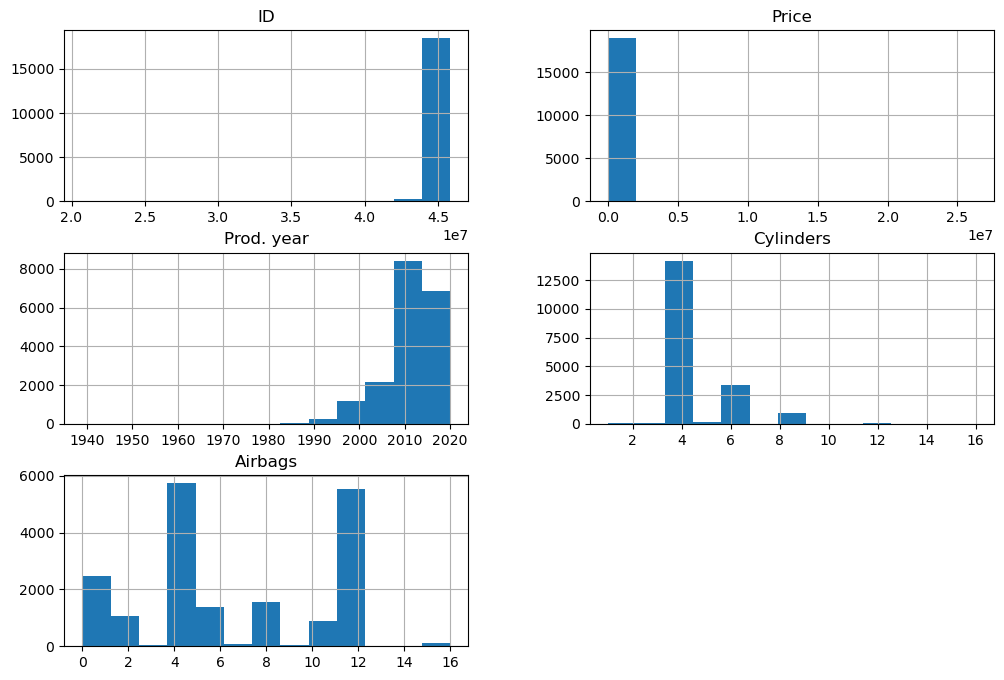

In [17]:
## plot the histograms of numerical variables
df.hist(bins=13, figsize=(12,8))
plt.show()

In [18]:
## display the top 10 cars interms of number
top10cars=df['Manufacturer'].value_counts().sort_values(ascending=False)[:10] # top 10 cars
top10cars

Manufacturer
HYUNDAI          3729
TOYOTA           3606
MERCEDES-BENZ    2043
FORD             1088
CHEVROLET        1047
BMW              1036
HONDA             960
LEXUS             927
NISSAN            645
VOLKSWAGEN        571
Name: count, dtype: int64

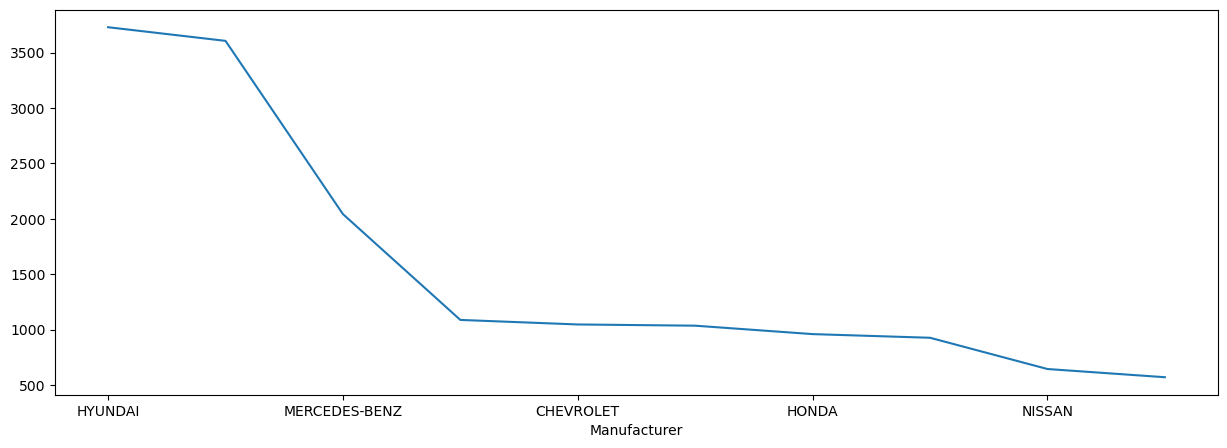

In [22]:
## plot the top 10 cars
top10cars.plot(figsize=(15,5))
plt.show()

In [23]:
## calculate the mean prices of the top 10 cars
top10carsmeanprices=[df[df['Manufacturer'] == i]['Price'].mean() for i in list(top10cars.index)]
top10carsmeanprices

[22306.00080450523,
 14302.447864669994,
 18590.331375428294,
 15411.85018382353,
 14894.873925501433,
 20609.468146718147,
 14162.073958333332,
 20052.594390507013,
 9835.84031007752,
 11471.77408056042]

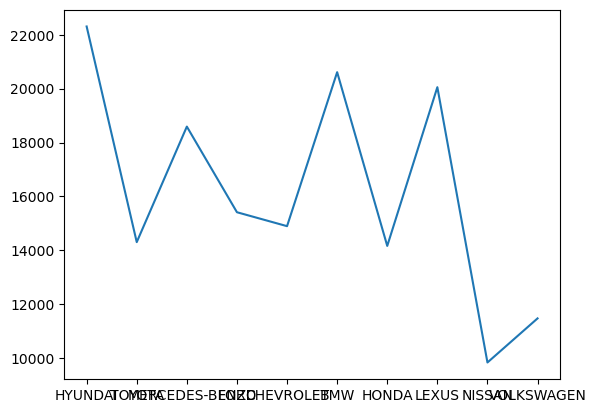

In [24]:
## plot the mean prices of the top 10 cars
plt.plot(top10cars.index, top10carsmeanprices)
plt.show()

In [26]:
# the correlation matrix of numerical variables
##cor=df.corr()
##cor
# heatmap
#sns.heatmap(cor,linewidth='0.5', annot=True)
#plt.show()

In [27]:
df_obj=df.select_dtypes(include='object')
df_obj.head()

,Levy,Manufacturer,Model,Category,Leather interior,Fuel type,Engine volume,Mileage,Gear box type,Drive wheels,Doors,Wheel,Color
0,1399,LEXUS,RX 450,Jeep,Yes,Hybrid,3.5,186005 km,Automatic,4x4,04-May,Left wheel,Silver
1,1018,CHEVROLET,Equinox,Jeep,No,Petrol,3,192000 km,Tiptronic,4x4,04-May,Left wheel,Black
2,-,HONDA,FIT,Hatchback,No,Petrol,1.3,200000 km,Variator,Front,04-May,Right-hand drive,Black
3,862,FORD,Escape,Jeep,Yes,Hybrid,2.5,168966 km,Automatic,4x4,04-May,Left wheel,White
4,446,HONDA,FIT,Hatchback,Yes,Petrol,1.3,91901 km,Automatic,Front,04-May,Left wheel,Silver


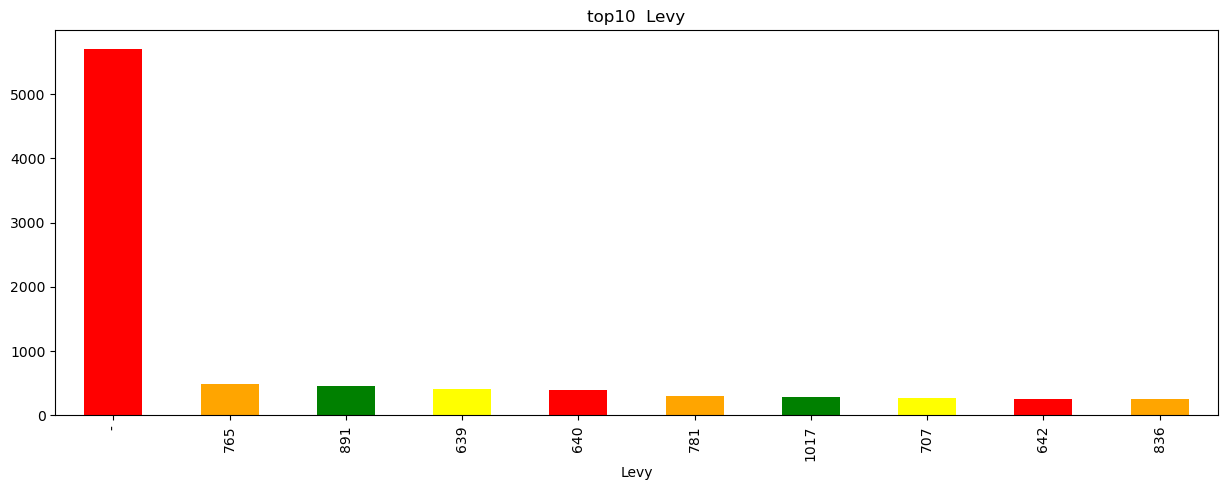

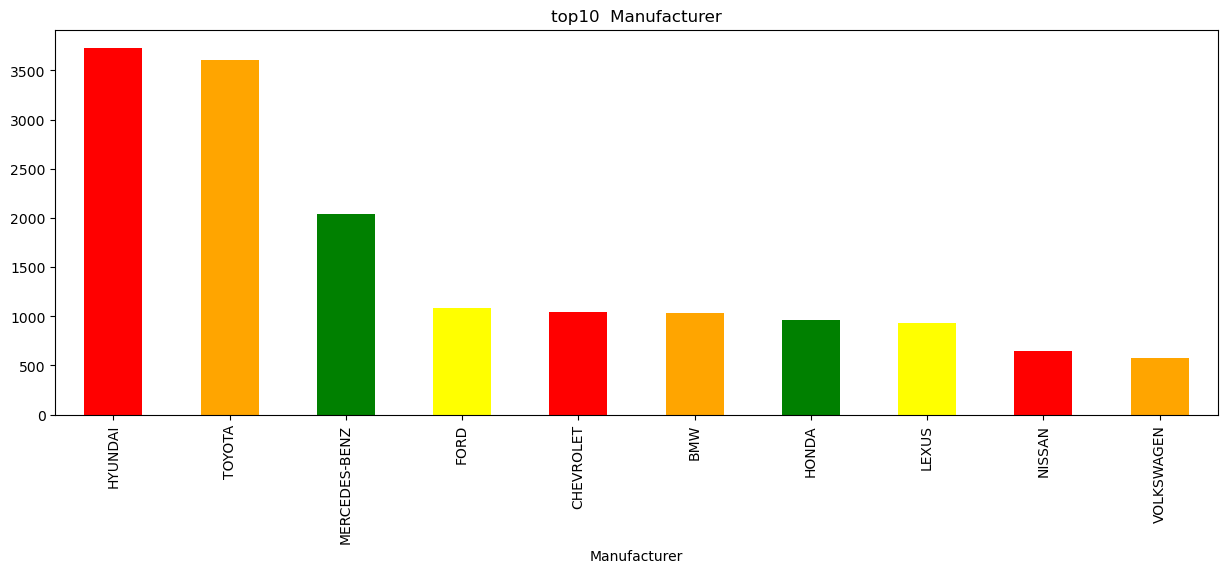

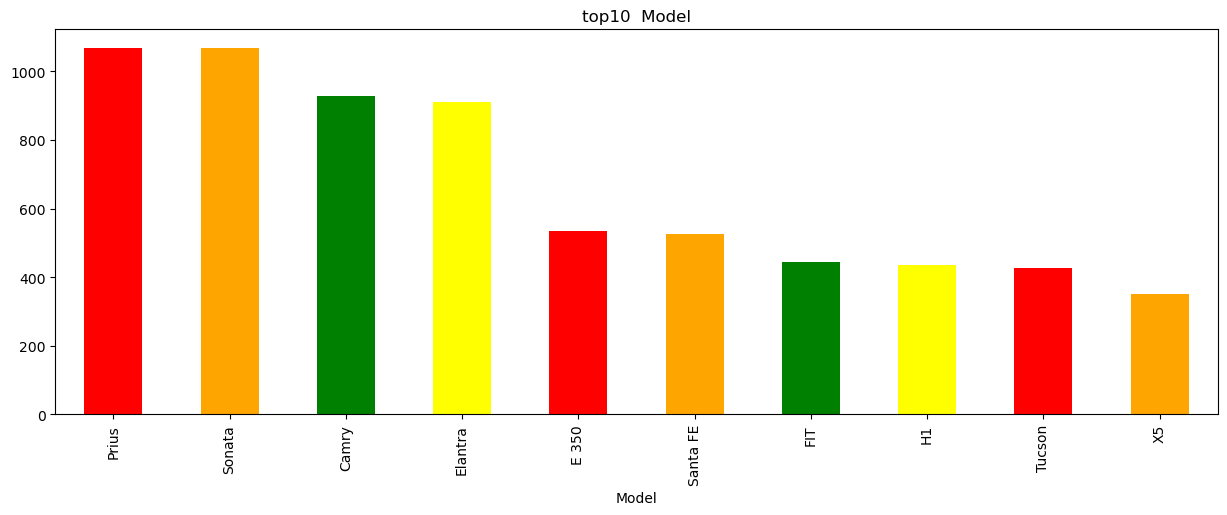

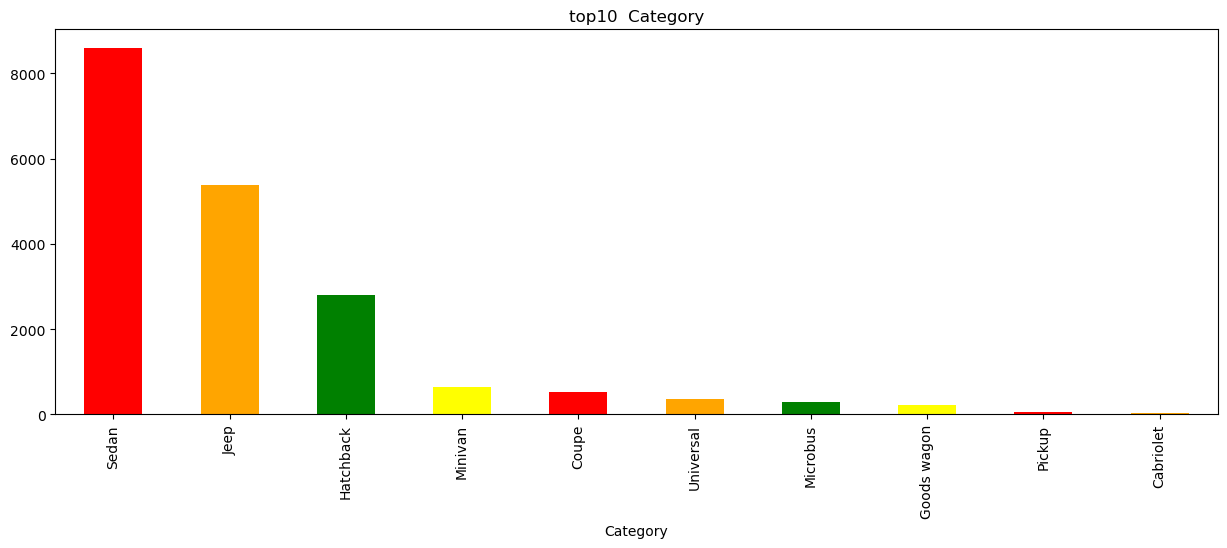

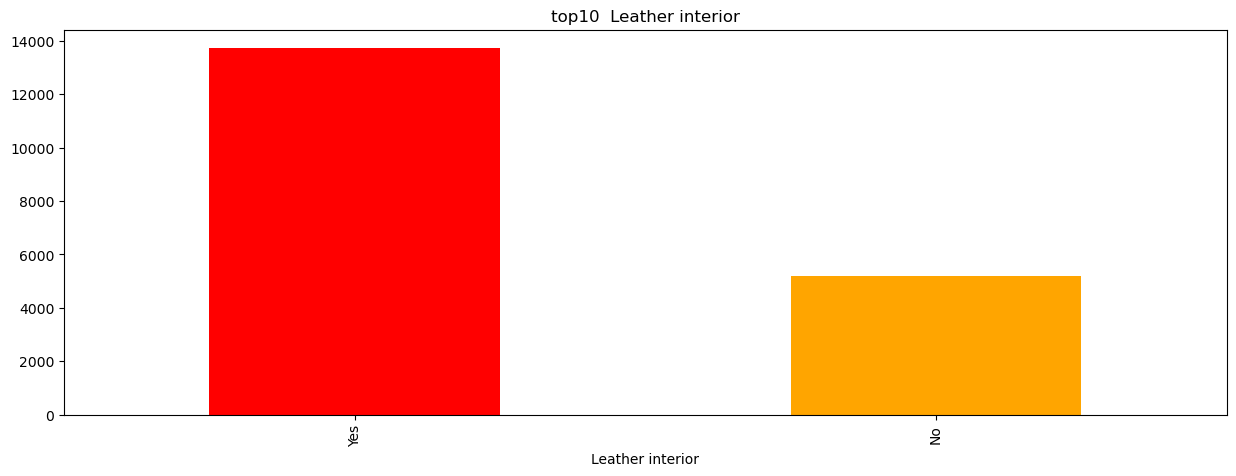

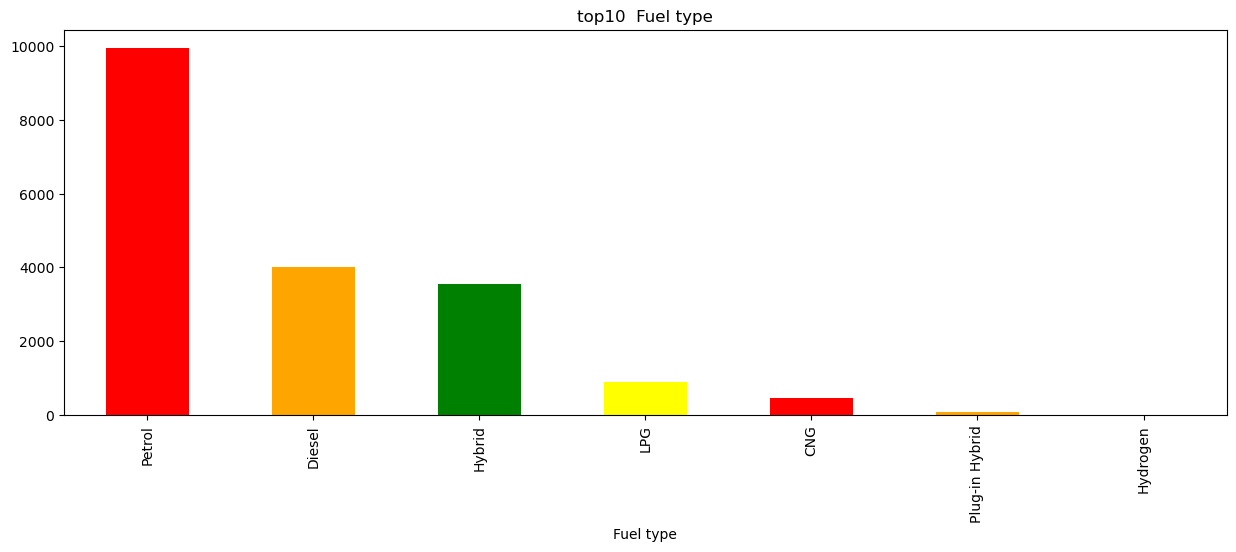

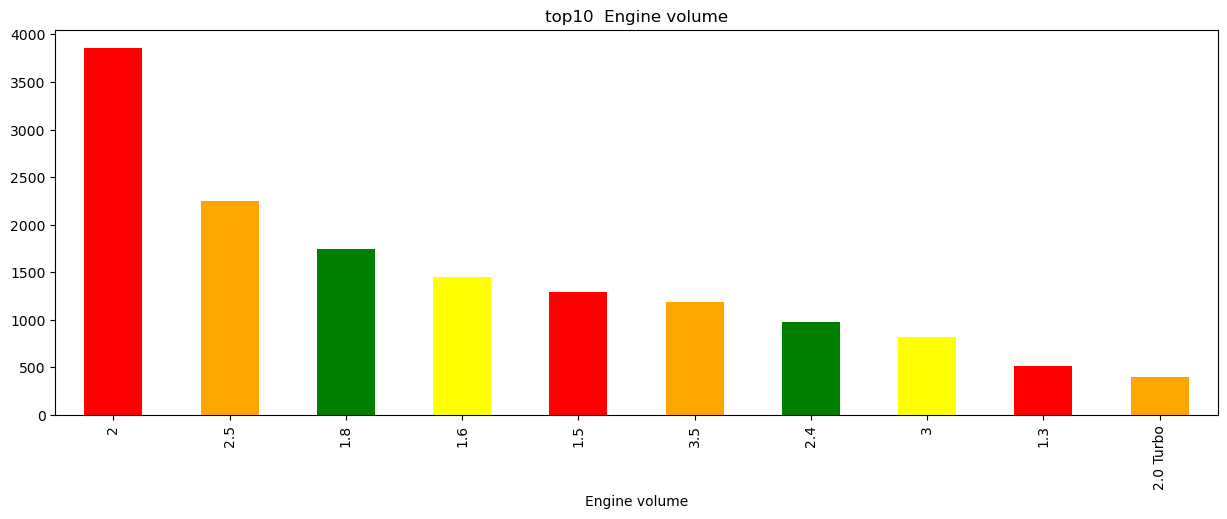

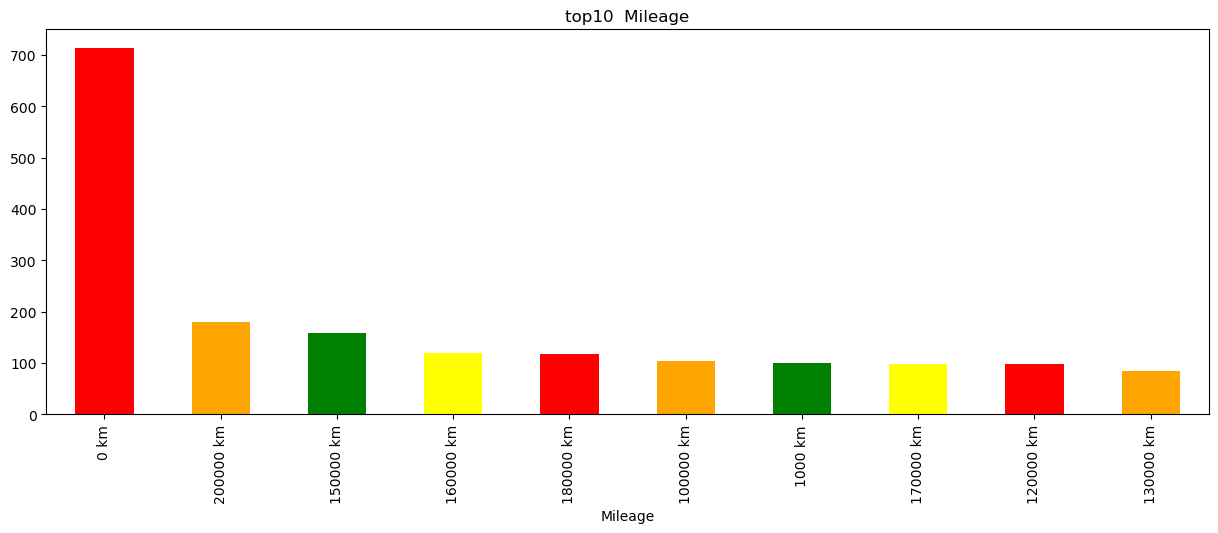

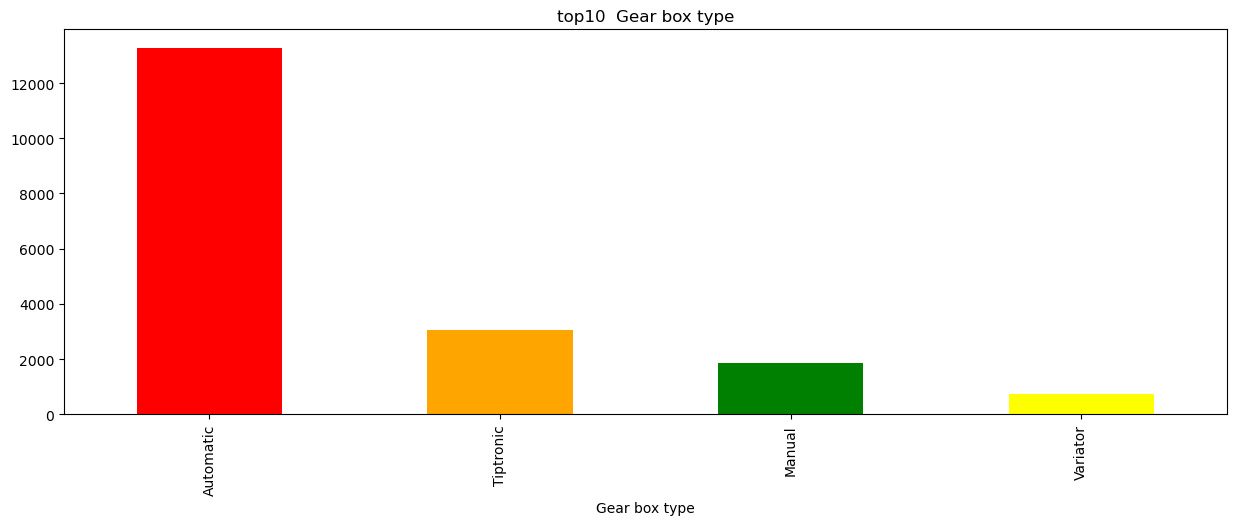

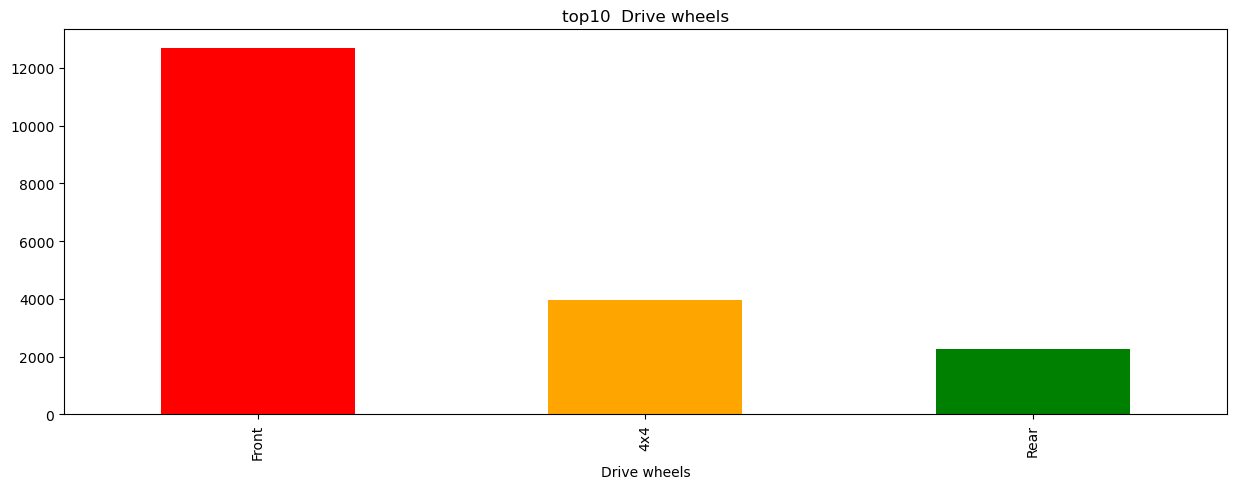

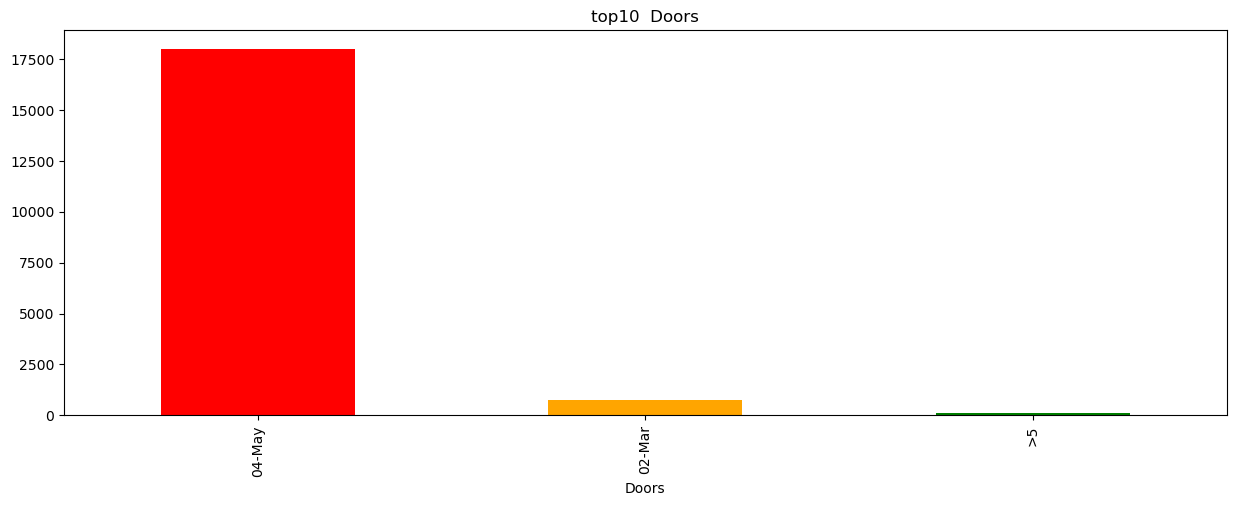

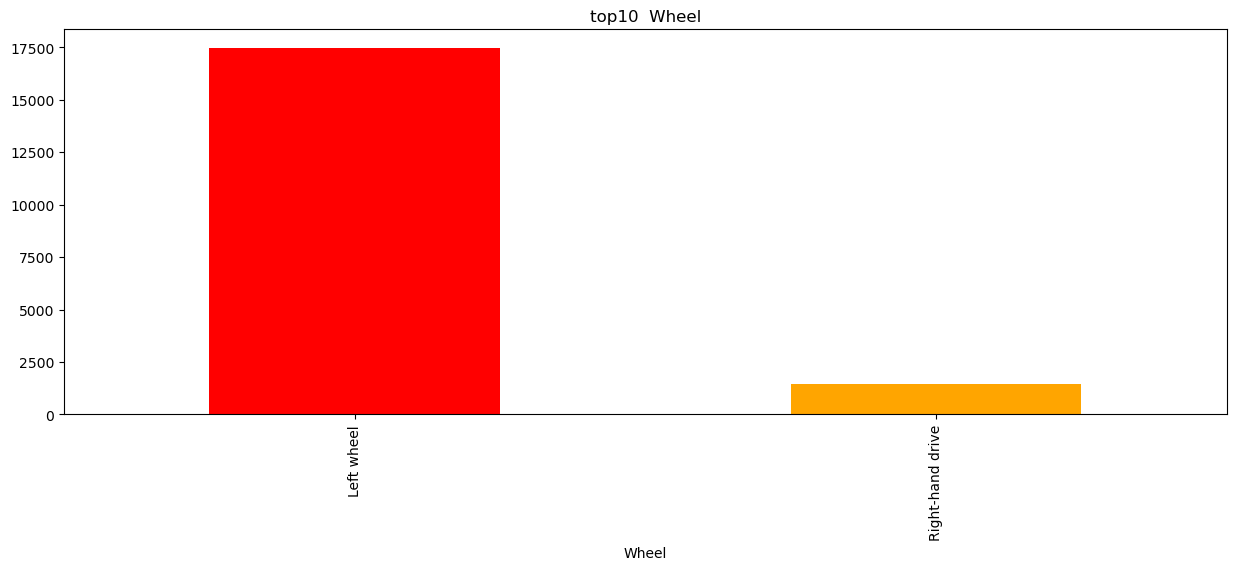

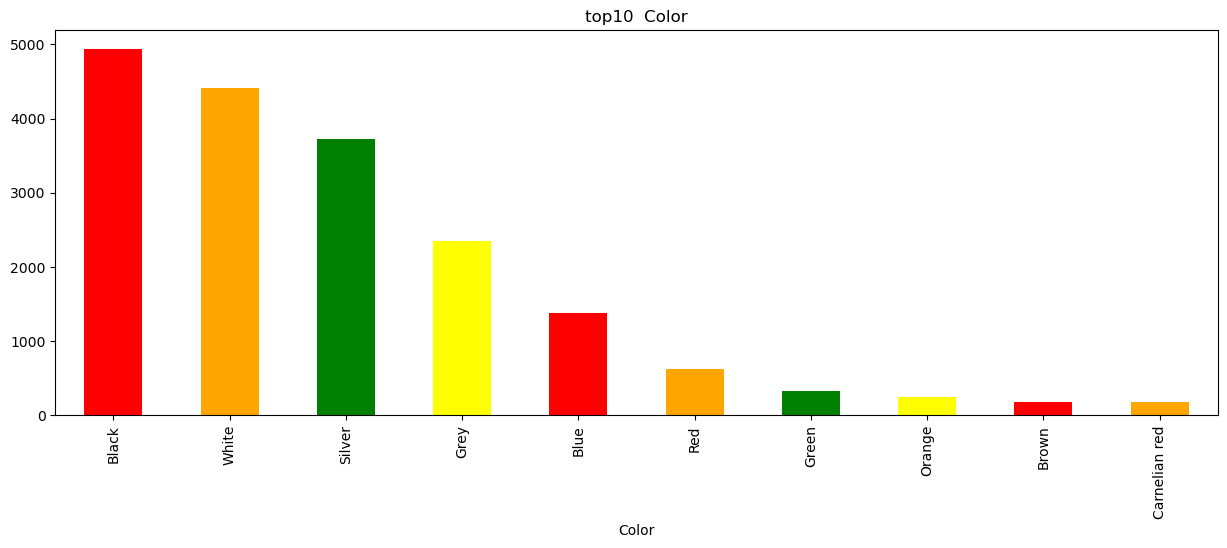

In [28]:
for col in df_obj:
    plt.figure(figsize=(15,5))
    top10=df[col].value_counts()[:10]
    colors=['red','orange','green','yellow']
    top10.plot(kind='bar', color=colors)
    plt.title('top10'+"  "+col)
    plt.show()

In [29]:
## Data Preprocessing
df = df.drop(['ID', 'Doors'],axis=1)
df

,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Wheel,Color,Airbags
0,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005 km,6.0,Automatic,4x4,Left wheel,Silver,12
1,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000 km,6.0,Tiptronic,4x4,Left wheel,Black,8
2,8467,-,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000 km,4.0,Variator,Front,Right-hand drive,Black,2
3,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966 km,4.0,Automatic,4x4,Left wheel,White,0
4,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901 km,4.0,Automatic,Front,Left wheel,Silver,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19232,8467,-,MERCEDES-BENZ,CLK 200,1999,Coupe,Yes,CNG,2.0 Turbo,300000 km,4.0,Manual,Rear,Left wheel,Silver,5
19233,15681,831,HYUNDAI,Sonata,2011,Sedan,Yes,Petrol,2.4,161600 km,4.0,Tiptronic,Front,Left wheel,Red,8
19234,26108,836,HYUNDAI,Tucson,2010,Jeep,Yes,Diesel,2,116365 km,4.0,Automatic,Front,Left wheel,Grey,4
19235,5331,1288,CHEVROLET,Captiva,2007,Jeep,Yes,Diesel,2,51258 km,4.0,Automatic,Front,Left wheel,Black,4


In [31]:
## Date
import datetime
dtime=datetime.datetime.now()
dtime

datetime.datetime(2024, 9, 9, 10, 16, 31, 80424)

In [33]:
## create the 'age' column from the year of production upto now (2024)
df['Age']=dtime.year-df['Prod. year']
df.head(4)

,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Wheel,Color,Airbags,Age
0,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005 km,6.0,Automatic,4x4,Left wheel,Silver,12,14
1,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000 km,6.0,Tiptronic,4x4,Left wheel,Black,8,13
2,8467,-,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000 km,4.0,Variator,Front,Right-hand drive,Black,2,18
3,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966 km,4.0,Automatic,4x4,Left wheel,White,0,13


In [34]:
df=df.drop('Prod. year',axis=1)

In [36]:
## replace the dash values in the 'levy' column with 0
## Levy
df.Levy.replace({'-':'0'}, inplace=True)
df['Levy']=df['Levy'].astype(int)
df.head(3)

,Price,Levy,Manufacturer,Model,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Wheel,Color,Airbags,Age
0,13328,1399,LEXUS,RX 450,Jeep,Yes,Hybrid,3.5,186005 km,6.0,Automatic,4x4,Left wheel,Silver,12,14
1,16621,1018,CHEVROLET,Equinox,Jeep,No,Petrol,3,192000 km,6.0,Tiptronic,4x4,Left wheel,Black,8,13
2,8467,0,HONDA,FIT,Hatchback,No,Petrol,1.3,200000 km,4.0,Variator,Front,Right-hand drive,Black,2,18


In [37]:
## Mileage
df['Mileage']=df['Mileage'].str.replace('km','')
df.head(3)

,Price,Levy,Manufacturer,Model,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Wheel,Color,Airbags,Age
0,13328,1399,LEXUS,RX 450,Jeep,Yes,Hybrid,3.5,186005,6.0,Automatic,4x4,Left wheel,Silver,12,14
1,16621,1018,CHEVROLET,Equinox,Jeep,No,Petrol,3,192000,6.0,Tiptronic,4x4,Left wheel,Black,8,13
2,8467,0,HONDA,FIT,Hatchback,No,Petrol,1.3,200000,4.0,Variator,Front,Right-hand drive,Black,2,18


In [38]:
## Engine volume
df['Engine volume'].unique()

array(['3.5', '3', '1.3', '2.5', '2', '1.8', '2.4', '4', '1.6', '3.3',
       '2.0 Turbo', '2.2 Turbo', '4.7', '1.5', '4.4', '3.0 Turbo',
       '1.4 Turbo', '3.6', '2.3', '1.5 Turbo', '1.6 Turbo', '2.2',
       '2.3 Turbo', '1.4', '5.5', '2.8 Turbo', '3.2', '3.8', '4.6', '1.2',
       '5', '1.7', '2.9', '0.5', '1.8 Turbo', '2.4 Turbo', '3.5 Turbo',
       '1.9', '2.7', '4.8', '5.3', '0.4', '2.8', '3.2 Turbo', '1.1',
       '2.1', '0.7', '5.4', '1.3 Turbo', '3.7', '1', '2.5 Turbo', '2.6',
       '1.9 Turbo', '4.4 Turbo', '4.7 Turbo', '0.8', '0.2 Turbo', '5.7',
       '4.8 Turbo', '4.6 Turbo', '6.7', '6.2', '1.2 Turbo', '3.4',
       '1.7 Turbo', '6.3 Turbo', '2.7 Turbo', '4.3', '4.2', '2.9 Turbo',
       '0', '4.0 Turbo', '20', '3.6 Turbo', '0.3', '3.7 Turbo', '5.9',
       '5.5 Turbo', '0.2', '2.1 Turbo', '5.6', '6', '0.7 Turbo',
       '0.6 Turbo', '6.8', '4.5', '0.6', '7.3', '0.1', '1.0 Turbo', '6.3',
       '4.5 Turbo', '0.8 Turbo', '4.2 Turbo', '3.1', '5.0 Turbo', '6.4',
       '3

In [39]:
df['Engine volume']=df['Engine volume'].str.replace('Turbo','')
df['Engine volume']=df['Engine volume'].astype(float)

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18924 entries, 0 to 19236
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Price             18924 non-null  int64  
 1   Levy              18924 non-null  int32  
 2   Manufacturer      18924 non-null  object 
 3   Model             18924 non-null  object 
 4   Category          18924 non-null  object 
 5   Leather interior  18924 non-null  object 
 6   Fuel type         18924 non-null  object 
 7   Engine volume     18924 non-null  float64
 8   Mileage           18924 non-null  object 
 9   Cylinders         18924 non-null  float64
 10  Gear box type     18924 non-null  object 
 11  Drive wheels      18924 non-null  object 
 12  Wheel             18924 non-null  object 
 13  Color             18924 non-null  object 
 14  Airbags           18924 non-null  int64  
 15  Age               18924 non-null  int64  
dtypes: float64(2), int32(1), int64(3), object(10)

In [41]:
## detect outlier
df_numeric=df.select_dtypes(exclude='object')
for col in df_numeric:
    q1=df_numeric[col].quantile(0.25)
    q3=df_numeric[col].quantile(0.75)
    iqr=q3-q1
    low=q1-1.5*iqr
    high=q3+1.5*iqr
    outlier=((df_numeric[col]>high) | (df_numeric[col]<low)).sum()
    total=df_numeric[col].shape[0]
    print(f'Total outlier in {col} are:{outlier}--{round(100*(outlier)/total,2)}')
    if outlier>0:
        df=df.loc[(df[col]<=high) & (df[col]>=low)]

Total outlier in Price are:1055--5.57
Total outlier in Levy are:160--0.85
Total outlier in Engine volume are:1358--7.18
Total outlier in Cylinders are:4765--25.18
Total outlier in Airbags are:0--0.0
Total outlier in Age are:962--5.08


In [42]:
## tranform data
df_obj = df.select_dtypes(include='object')
df_numeric=df.select_dtypes(exclude='object')

In [43]:
from sklearn.preprocessing import LabelEncoder
la=LabelEncoder()

In [44]:
for i in range(0, df_obj.shape[1]):
    df_obj.iloc[:,i]=la.fit_transform(df_obj.iloc[:,i])

In [45]:
df=pd.concat([df_obj, df_numeric],axis=1)
df

,Manufacturer,Model,Category,Leather interior,Fuel type,Mileage,Gear box type,Drive wheels,Wheel,Color,Price,Levy,Engine volume,Cylinders,Airbags,Age
2,17,382,3,0,4,2518,3,1,1,1,8467,0,1.3,4.0,2,18
3,13,369,4,1,2,1967,0,0,0,14,3607,862,2.5,4.0,0,13
4,17,382,3,1,4,5758,0,1,0,12,11726,446,1.3,4.0,4,10
5,18,741,4,1,1,1789,0,1,0,14,39493,891,2.0,4.0,4,8
6,45,669,3,1,2,3098,0,1,0,14,1803,761,1.8,4.0,12,14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19230,45,669,3,1,2,3428,0,1,0,12,470,645,1.8,4.0,12,13
19233,18,756,8,1,4,1806,2,1,0,11,15681,831,2.4,4.0,8,13
19234,18,837,4,1,1,535,0,1,0,7,26108,836,2.0,4.0,4,14
19235,6,238,4,1,1,4300,0,1,0,1,5331,1288,2.0,4.0,4,17


In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12732 entries, 2 to 19236
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Manufacturer      12732 non-null  object 
 1   Model             12732 non-null  object 
 2   Category          12732 non-null  object 
 3   Leather interior  12732 non-null  object 
 4   Fuel type         12732 non-null  object 
 5   Mileage           12732 non-null  object 
 6   Gear box type     12732 non-null  object 
 7   Drive wheels      12732 non-null  object 
 8   Wheel             12732 non-null  object 
 9   Color             12732 non-null  object 
 10  Price             12732 non-null  int64  
 11  Levy              12732 non-null  int32  
 12  Engine volume     12732 non-null  float64
 13  Cylinders         12732 non-null  float64
 14  Airbags           12732 non-null  int64  
 15  Age               12732 non-null  int64  
dtypes: float64(2), int32(1), int64(3), object(10)

In [47]:
## create a model now
df

,Manufacturer,Model,Category,Leather interior,Fuel type,Mileage,Gear box type,Drive wheels,Wheel,Color,Price,Levy,Engine volume,Cylinders,Airbags,Age
2,17,382,3,0,4,2518,3,1,1,1,8467,0,1.3,4.0,2,18
3,13,369,4,1,2,1967,0,0,0,14,3607,862,2.5,4.0,0,13
4,17,382,3,1,4,5758,0,1,0,12,11726,446,1.3,4.0,4,10
5,18,741,4,1,1,1789,0,1,0,14,39493,891,2.0,4.0,4,8
6,45,669,3,1,2,3098,0,1,0,14,1803,761,1.8,4.0,12,14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19230,45,669,3,1,2,3428,0,1,0,12,470,645,1.8,4.0,12,13
19233,18,756,8,1,4,1806,2,1,0,11,15681,831,2.4,4.0,8,13
19234,18,837,4,1,1,535,0,1,0,7,26108,836,2.0,4.0,4,14
19235,6,238,4,1,1,4300,0,1,0,1,5331,1288,2.0,4.0,4,17


In [49]:
## label the independent and dependent variables
x=df.drop('Price', axis=1)
y=df['Price']

In [50]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2, random_state=21)

In [51]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import r2_score, mean_squared_error

In [52]:
algorithm = ['LinearRegression','DecisionTreeClassifier',
             'RandomForestRegressor','GradientBoostingRegressor','SVR']
R2=[]
RMSE=[]

In [54]:
model1 = LinearRegression()
model2 = DecisionTreeRegressor()
model3 = RandomForestRegressor()
model4 = GradientBoostingRegressor()
model5 = SVR()

In [55]:
def models(model):
    model.fit(x_train,y_train)
    pre = model.predict(x_test)
    acc = r2_score(y_test, pre)
    rmse = np.sqrt(mean_squared_error(y_test,pre))
    R2.append(acc)
    RMSE.append(rmse)
    score = model.score(x_test,y_test)
    print(f' The Score of model is :{score}')

In [56]:
models(model1)
models(model2)
models(model3)
models(model4)
models(model5)

 The Score of model is :0.22916814083730253
 The Score of model is :0.5985312112529295
 The Score of model is :0.7854010532178336
 The Score of model is :0.668936802894413
 The Score of model is :-0.010046324816023633


In [57]:
dataframe = pd.DataFrame({'Algorithm' :algorithm, 'R2_score' :R2, 'RMSE' : RMSE})
dataframe

,Algorithm,R2_score,RMSE
0,LinearRegression,0.229168,9808.015353
1,DecisionTreeClassifier,0.598531,7078.271272
2,RandomForestRegressor,0.785401,5175.056575
3,GradientBoostingRegressor,0.668937,6427.717206
4,SVR,-0.010046,11227.212825


In [ ]:
## The best performed algorithm is the random forest regressor with an r-squared of 78% and an RMSE of 5175.